# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Jake Rood

### GitHub Repository: [jakerood/article-summarizer-final-project](https://github.com/jakerood/article-summarizer-final-project)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Test for Import Errors

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the final project, try these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python virtual environment.

from bs4 import BeautifulSoup
from collections import Counter
import json
import matplotlib.pyplot as plt
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')

!pip list

All prereqs installed.
Package                      Version
---------------------------- -----------
absl-py                      1.4.0
annotated-types              0.5.0
anyio                        3.7.1
appdirs                      1.4.4
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
astroid                      2.15.6
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
black                        24.3.0
bleach                       6.0.0
blis                         0.7.10
cachetools                   5.3.1
catalogue                    2.0.9
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
click                        8.1.7
cloudpathli

### Question #1
Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
# URL of the webpage
url = "https://sports.yahoo.com/caitlin-clark-effect-set-transform-214638344.html"

# Send a request to the URL
response = requests.get(url)

# Confirm if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    html_content = BeautifulSoup(response.content, "html.parser")

    # Find the article content
    article_content = html_content.find("article")

    # Check if the article content is found
    if article_content:
        # Dump the article content into a pickle file
        with open("article_content.pkl", "wb") as file:
            pickle.dump(str(article_content), file)
        print("Article content dumped to article_content.pkl")
    else:
        print("Article content not found")
else:
    print("Error:", response.status_code)

Article content dumped to article_content.pkl


### Question #2
Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:
# Read in the article from the pickle file
with open("article_content.pkl", "rb") as file:
    article_html = pickle.load(file)

# Convert the HTML to a BeautifulSoup object
soup = BeautifulSoup(article_html, "html.parser")

# Get the text from the article content
article_text = soup.get_text()

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Add SpacyTextBlob to the pipeline
nlp.add_pipe('spacytextblob')

# Process the article text with spaCy
doc = nlp(article_text)

# Get the polarity score
polarity = doc._.polarity

# Print the polarity score with an appropriate label
print("Polarity Score:", polarity)

# Count the number of sentences in the original article
num_sentences = len(list(doc.sents))

# Print the number of sentences with an appropriate label
print("Number of Sentences in the Original Article:", num_sentences)

Polarity Score: 0.12739898989898987
Number of Sentences in the Original Article: 32


### Question #3
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [4]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Define a set of stopwords
stopwords = nlp.Defaults.stop_words

# Initialize a Counter to count the frequency of tokens
token_counter = Counter()

# Iterate over tokens in the document
for token in doc:
    # Check if the token is a word (not punctuation or whitespace) and not a stop word
    if token.is_alpha and not token.is_stop:
        # Update the counter with the lowercase version of the token text
        token_counter[token.text.lower()] += 1

# Get the 5 most common tokens
most_common_tokens = token_counter.most_common(5)

# Print the 5 most common tokens with an appropriate label
print("5 Most Common Tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print all tokens and their frequencies with appropriate labels
print("\nAll Tokens and Their Frequencies:")
for token, frequency in token_counter.most_common():
    print(f"{token}: {frequency}")

5 Most Common Tokens:
clark: 17
women: 12
basketball: 9
college: 7
sport: 7

All Tokens and Their Frequencies:
clark: 17
women: 12
basketball: 9
college: 7
sport: 7
wnba: 7
said: 6
million: 6
sports: 5
going: 5
year: 4
kind: 4
engelbert: 4
media: 4
magic: 4
university: 4
south: 4
carolina: 4
impact: 4
game: 4
effect: 3
career: 3
caitlin: 3
pick: 3
draft: 3
league: 3
rights: 3
time: 3
bird: 3
season: 3
iowa: 3
collegiate: 3
indiana: 3
people: 3
set: 2
records: 2
old: 2
professional: 2
years: 2
told: 2
double: 2
fees: 2
long: 2
opportunity: 2
reese: 2
history: 2
men: 2
like: 2
bring: 2
followers: 2
x: 2
recent: 2
games: 2
according: 2
tsunami: 2
watched: 2
seats: 2
los: 2
angeles: 2
appeal: 2
las: 2
vegas: 2
arena: 2
kane: 2
stop: 2
better: 2
invest: 2
read: 1
transform: 1
wnbarob: 1
woollardmon: 1
apr: 1
min: 1
readlink: 1
dazzling: 1
smashed: 1
court: 1
legacy: 1
trailblazing: 1
icon: 1
secure: 1
prepares: 1
chosen: 1
week: 1
experts: 1
predicting: 1
transformative: 1
cathy: 1
commissi

### Question #4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [5]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Define a set of stopwords
stopwords = nlp.Defaults.stop_words

# Initialize a Counter to count the frequency of lemmas
lemma_counter = Counter()

# Iterate over tokens in the document
for token in doc:
    # Check if the token is a word (not punctuation or whitespace) and not a stop word
    if token.is_alpha and not token.is_stop:
        # Update the counter with the lowercase version of the token's lemma
        lemma_counter[token.lemma_.lower()] += 1

# Get the 5 most common lemmas
most_common_lemmas = lemma_counter.most_common(5)

# Print the 5 most common lemmas with an appropriate label
print("5 Most Common Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies with appropriate labels
print("\nAll Lemmas and Their Frequencies:")
for lemma, frequency in lemma_counter.most_common():
    print(f"{lemma}: {frequency}")

5 Most Common Lemmas:
clark: 17
sport: 12
woman: 10
basketball: 9
college: 7

All Lemmas and Their Frequencies:
clark: 17
sport: 12
woman: 10
basketball: 9
college: 7
wnba: 7
say: 7
year: 6
million: 6
game: 6
go: 5
kind: 4
engelbert: 4
magic: 4
university: 4
south: 4
carolina: 4
impact: 4
season: 4
effect: 3
set: 3
career: 3
record: 3
caitlin: 3
pick: 3
draft: 3
league: 3
right: 3
opportunity: 3
time: 3
bird: 3
iowa: 3
collegiate: 3
indiana: 3
seat: 3
people: 3
old: 2
professional: 2
player: 2
tell: 2
expect: 2
medium: 2
deal: 2
double: 2
fee: 2
women: 2
long: 2
media: 2
reese: 2
history: 2
man: 2
like: 2
bring: 2
audience: 2
following: 2
follower: 2
x: 2
recent: 2
break: 2
accord: 2
tsunami: 2
watch: 2
start: 2
los: 2
angeles: 2
appeal: 2
las: 2
vegas: 2
arena: 2
kane: 2
end: 2
lift: 2
stop: 2
thrive: 2
continue: 2
well: 2
believe: 2
invest: 2
read: 1
transform: 1
wnbarob: 1
woollardmon: 1
apr: 1
min: 1
readlink: 1
dazzling: 1
smash: 1
court: 1
legacy: 1
trailblaze: 1
icon: 1
secure: 

### Question #5
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [6]:
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Score a sentence based on the frequency of interesting tokens.

    Args:
    - sentence (str): The input sentence.
    - interesting_tokens (list): List of interesting tokens.

    Returns:
    - float: The score of the sentence.
    """
    # Tokenize the sentence
    tokens = sentence.split()
    
    # Count the number of interesting tokens in the sentence
    interesting_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    
    # Calculate the score by dividing the number of interesting tokens by the total number of tokens
    score = interesting_count / len(tokens) if len(tokens) > 0 else 0
    
    return score

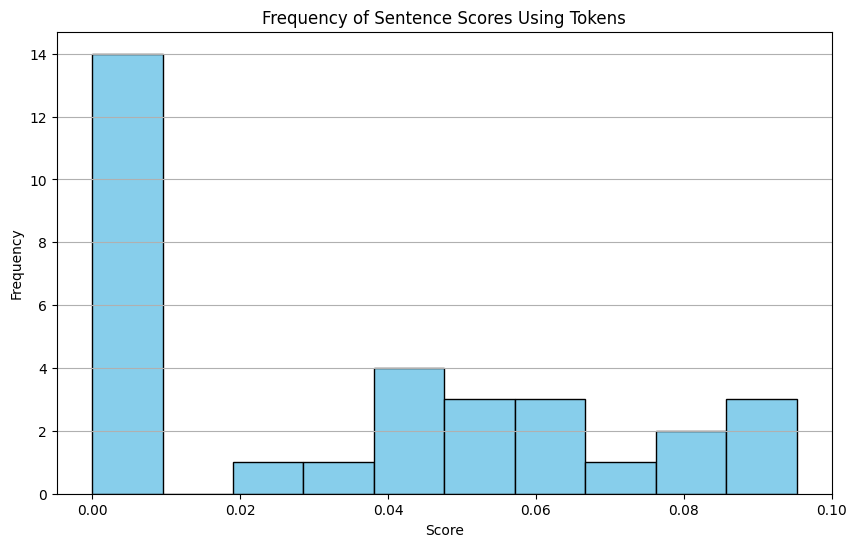

In [9]:
# Get the most frequent tokens (choosing 6 here since three tokens tied for the fourth most frequent)
frequent_tokens = token_counter.most_common(6)

# Extract the tokens from the frequent tokens list
interesting_tokens = [token for token, frequency in frequent_tokens]

# Extract sentences from the processed article
sentences = [sent.text for sent in doc.sents]

# Make a list containing the scores of every sentence in the article
sentence_scores = []
for sentence in sentences:
    score = score_sentence_by_token(sentence, interesting_tokens)
    sentence_scores.append(score)

# Plot a histogram of the scores
plt.figure(figsize=(10,6))
plt.hist(sentence_scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency of Sentence Scores Using Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


### Question #6
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [10]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Score a sentence based on the frequency of interesting lemmas.

    Args:
    - sentence (str): The input sentence.
    - interesting_lemmas (list): List of interesting lemmas.

    Returns:
    - float: The score of the sentence.
    """
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Count the number of interesting lemmas in the sentence
    interesting_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    
    # Calculate the score by dividing the number of interesting lemmas by the total number of tokens
    score = interesting_count / len(doc) if len(doc) > 0 else 0
    
    return score

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?